In [2]:
#Import libraries
import math
import pandas_datareader as pdr
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pdr.get_data_tiingo('NFLX', api_key='cd0ed556b0802933c19d8b3f74e65cde27e455f1')
df.to_csv('NFLX.csv')
df=pd.read_csv('NFLX.csv')
df.head()
df.shape #Gets the number of rows & column of dataset

<ipython-input-3-f8706f1a4d3e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('NFLX', api_key='cd0ed556b0802933c19d8b3f74e65cde27e455f1')


(1258, 14)

In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,NFLX,2023-06-16 00:00:00+00:00,431.96,447.51,430.9000,446.15,8753740,431.96,447.51,430.9000,446.15,8753740,0.0,1.0
1254,NFLX,2023-06-20 00:00:00+00:00,434.70,440.00,430.0000,430.18,4762313,434.70,440.00,430.0000,430.18,4762313,0.0,1.0
1255,NFLX,2023-06-21 00:00:00+00:00,424.45,434.55,422.5400,432.65,5146441,424.45,434.55,422.5400,432.65,5146441,0.0,1.0
1256,NFLX,2023-06-22 00:00:00+00:00,422.48,424.71,418.6801,422.93,4872246,422.48,424.71,418.6801,422.93,4872246,0.0,1.0
1257,NFLX,2023-06-23 00:00:00+00:00,424.02,425.82,417.7300,418.59,8298600,424.02,425.82,417.7300,418.59,8298600,0.0,1.0


In [5]:
df1=df.reset_index()['close']
df1
df1.shape

(1258,)

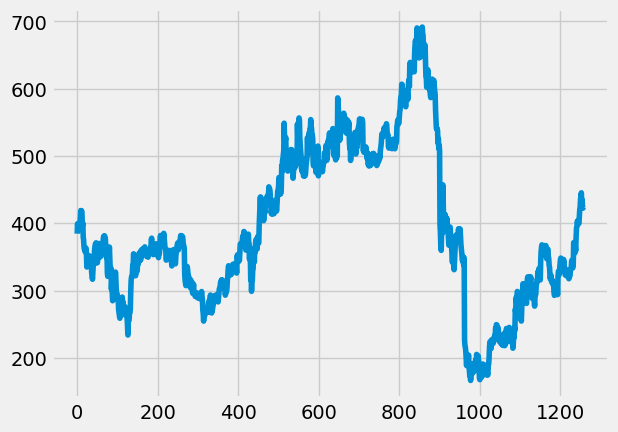

In [6]:
plt.plot(df1)

In [7]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
df1

0       384.48
1       399.39
2       390.39
3       395.42
4       391.43
         ...  
1253    431.96
1254    434.70
1255    424.45
1256    422.48
1257    424.02
Name: close, Length: 1258, dtype: float64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.41519455]
 [0.44357725]
 [0.42644483]
 ...
 [0.4912815 ]
 [0.48753141]
 [0.49046296]]


In [9]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(817, 441)

In [11]:
train_data

array([[0.41519455],
       [0.44357725],
       [0.42644483],
       [0.43601995],
       [0.42842458],
       [0.44127389],
       [0.4266923 ],
       [0.44167365],
       [0.46044316],
       [0.48084977],
       [0.47449174],
       [0.48024062],
       [0.47043707],
       [0.43674332],
       [0.44565217],
       [0.40567654],
       [0.39739587],
       [0.37664662],
       [0.37059316],
       [0.37365796],
       [0.36349273],
       [0.37405772],
       [0.37447651],
       [0.35947613],
       [0.3209282 ],
       [0.32566816],
       [0.32743851],
       [0.33908856],
       [0.33640448],
       [0.35130968],
       [0.35304196],
       [0.34500876],
       [0.34834006],
       [0.34169649],
       [0.33301607],
       [0.32574431],
       [0.30463337],
       [0.2970951 ],
       [0.28632072],
       [0.30716516],
       [0.32675322],
       [0.33897434],
       [0.32894236],
       [0.36634813],
       [0.37731288],
       [0.38475596],
       [0.38389934],
       [0.389

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 379ms/step - loss: 0.0922 - val_loss: 0.0117
Epoch 2/100
12/12 [==============================] - 3s 239ms/step - loss: 0.0104 - val_loss: 0.0190
Epoch 3/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0062 - val_loss: 0.0073
Epoch 4/100
12/12 [==============================] - 4s 322ms/step - loss: 0.0036 - val_loss: 0.0064
Epoch 5/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0026 - val_loss: 0.0056
Epoch 6/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0022 - val_loss: 0.0052
Epoch 7/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0022 - val_loss: 0.0050
Epoch 8/100
12/12 [==============================] - 3s 233ms/step - loss: 0.0021 - val_loss: 0.0048
Epoch 9/100
12/12 [==============================] - 4s 308ms/step - loss: 0.0021 - val_loss: 0.0047
Epoch 10/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0021 - val_l

In [22]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 41ms/step


In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

438.75110284195836

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

307.2625382804375

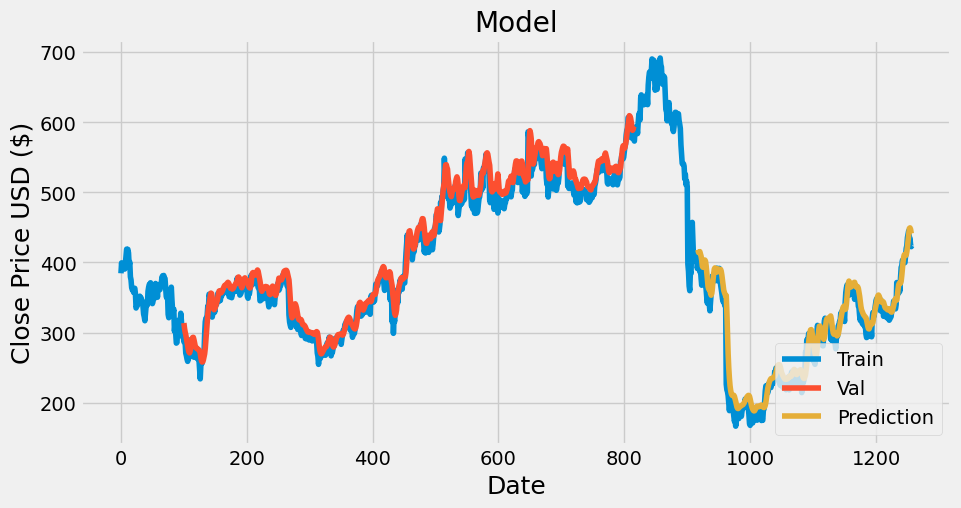

In [27]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize= (10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Train', 'Val', 'Prediction'], loc= 'lower right')
plt.show()

In [28]:
len(test_data)

441

In [29]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input

[0.35547856544582346,
 0.35690626665651415,
 0.3723825477804005,
 0.3817101956902459,
 0.3798256300921342,
 0.3714117109571309,
 0.3742100053300844,
 0.38159597959339064,
 0.37335338460367007,
 0.344532856163862,
 0.3658722302596512,
 0.3685182365034645,
 0.37129749486027563,
 0.3509099215716134,
 0.34567501713241444,
 0.3257633442473159,
 0.32077590801796996,
 0.2993984618898956,
 0.28702505139724344,
 0.298218228889058,
 0.29650498743622933,
 0.2800388334729308,
 0.27699307089012404,
 0.2832749562171628,
 0.27727861113226215,
 0.2705017893855174,
 0.2768217467448413,
 0.25015228812914025,
 0.24059620802558435,
 0.24202390923627493,
 0.24474605954465845,
 0.26159293383080784,
 0.27352851595218153,
 0.2610408893626741,
 0.2641437599939084,
 0.2654001370593162,
 0.24276631386583403,
 0.29315464859514195,
 0.3084215335414604,
 0.30703190436305494,
 0.2991509936800426,
 0.31535064341734553,
 0.3275336937485722,
 0.3409540851290642,
 0.3462841696489758,
 0.3433716591791669,
 0.334995812076

In [32]:
from numpy import array

lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        # Adjust the reshaping when temp_input has a length less than n_steps
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)


0 day input [0.35690627 0.37238255 0.3817102  0.37982563 0.37141171 0.37421001
 0.38159598 0.37335338 0.34453286 0.36587223 0.36851824 0.37129749
 0.35090992 0.34567502 0.32576334 0.32077591 0.29939846 0.28702505
 0.29821823 0.29650499 0.28003883 0.27699307 0.28327496 0.27727861
 0.27050179 0.27682175 0.25015229 0.24059621 0.24202391 0.24474606
 0.26159293 0.27352852 0.26104089 0.26414376 0.26540014 0.24276631
 0.29315465 0.30842153 0.3070319  0.29915099 0.31535064 0.32753369
 0.34095409 0.34628417 0.34337166 0.33499581 0.32924694 0.32859971
 0.3271149  0.31344704 0.34230564 0.32791441 0.31666413 0.31852966
 0.29838955 0.30263458 0.30764106 0.3096208  0.2973045  0.29463946
 0.30358639 0.31135308 0.30029315 0.28778649 0.29111779 0.29393513
 0.29770426 0.31378969 0.31556004 0.32180385 0.33958349 0.33031295
 0.32269855 0.31862484 0.3304462  0.39008604 0.37879769 0.37432422
 0.36096094 0.37782685 0.36669078 0.40453438 0.43137516 0.43565827
 0.45069672 0.44563314 0.45147719 0.44338689 0.444

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [34]:
import matplotlib.pyplot as plt

In [35]:
len(df1)

1258

In [36]:
df3=df1.tolist()
df3.extend(lst_output)

ValueError: ignored

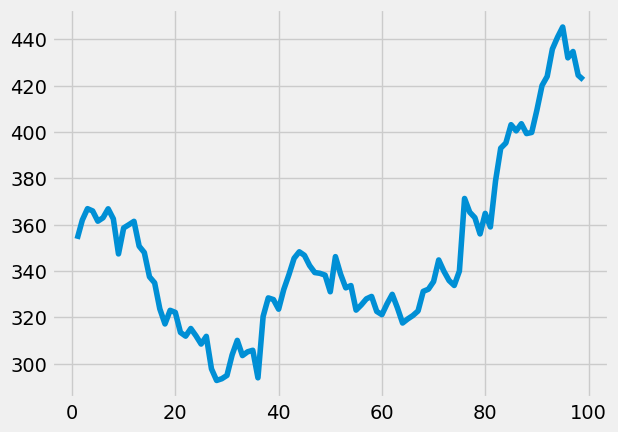

In [37]:
plt.plot(day_new[:-1], scaler.inverse_transform(df1[1158:1257]))
# Adjust the range according to your data
plt.plot(day_new[0:-1], scaler.inverse_transform(lst_output))
plt.plot(df1)
plt.show()


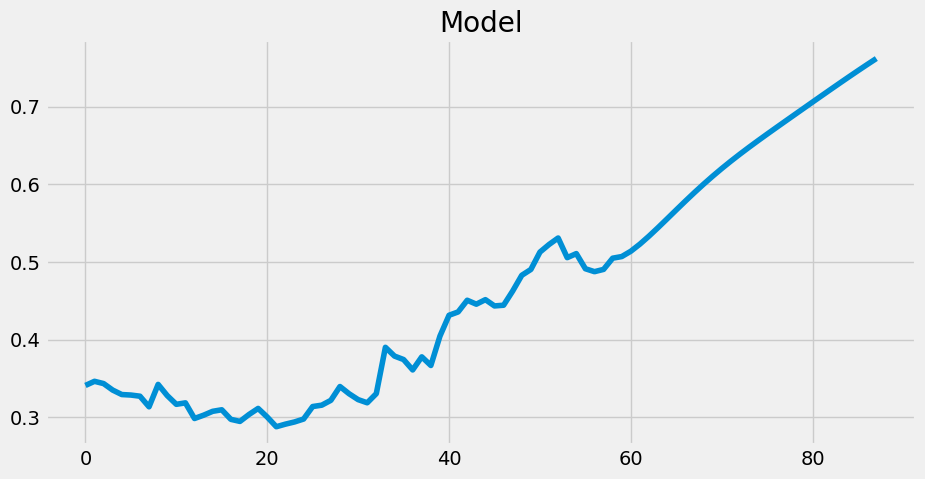

In [38]:
df3=df1.tolist()
df3.extend(lst_output)
plt.figure(figsize= (10,5))
plt.title('Model')
plt.plot(df3[1200:])

In [39]:
df3=scaler.inverse_transform(df3).tolist()

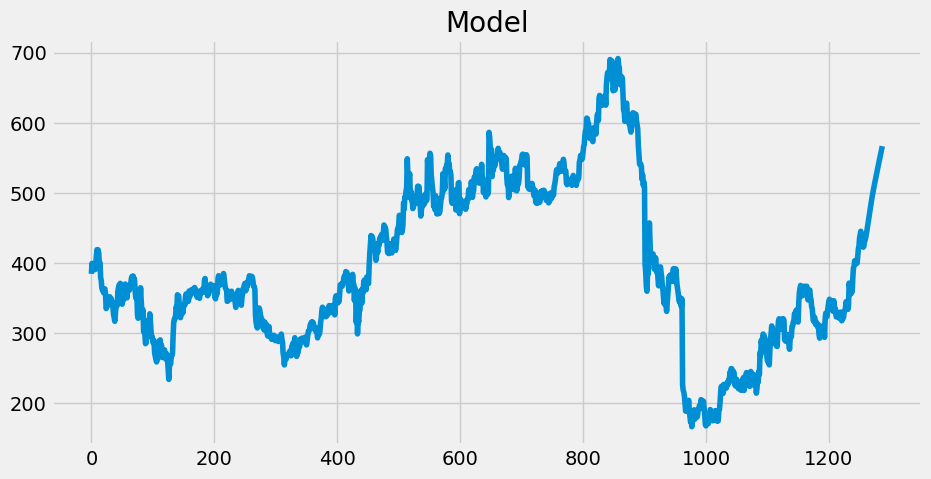

In [40]:
plt.figure(figsize= (10,5))
plt.title('Model')
plt.plot(df3)

# New Section